In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [9]:
df1 = pd.read_csv("https://www.sciencebuddies.org/ai/colab/spotify.csv?t=AQViuUi5z-ehU8_wuGQvQcSanTypHJtG41By-q1_dp2o0Q")
df1.head()

,Artist,Track,Album,Album_type,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,...,Title,Channel,Views,Likes,Comments,Licensed,official_video,Stream,EnergyLiveness,most_playedon
0,Gorillaz,Feel Good Inc.,Demon Days,album,0.818,0.705,-6.679,0.1770,0.008360,0.002330,...,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,True,True,1.040235e+09,1.150082,Spotify
1,Gorillaz,Rhinestone Eyes,Plastic Beach,album,0.676,0.703,-5.815,0.0302,0.086900,0.000687,...,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0,True,True,3.100837e+08,15.183585,Spotify
2,Gorillaz,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,0.695,0.923,-3.930,0.0522,0.042500,0.046900,...,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,8435055.0,282142.0,7399.0,True,True,6.306347e+07,7.956897,Spotify
3,Gorillaz,On Melancholy Hill,Plastic Beach,album,0.689,0.739,-5.810,0.0260,0.000015,0.509000,...,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,211754952.0,1788577.0,55229.0,True,True,4.346636e+08,11.546875,Spotify
4,Gorillaz,Clint Eastwood,Gorillaz,album,0.663,0.694,-8.627,0.1710,0.025300,0.000000,...,Gorillaz - Clint Eastwood (Official Video),Gorillaz,618480958.0,6197318.0,155930.0,True,True,6.172597e+08,9.942693,Youtube


In [11]:
df2 = pd.read_csv("C:\\Users\\Seijsener\\Downloads\\kaggle_spotify_dataset.csv")
df2.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


# Preprocessing the Dataset

Dropping NaN Values

In [12]:

print("Shape before dropping NaN values:", df1.shape)

df1.dropna(inplace=True)

print("Shape after dropping NaN values:", df1.shape)
df1.head()

Shape before dropping NaN values: (20594, 24)
Shape after dropping NaN values: (20592, 24)


,Artist,Track,Album,Album_type,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,...,Title,Channel,Views,Likes,Comments,Licensed,official_video,Stream,EnergyLiveness,most_playedon
0,Gorillaz,Feel Good Inc.,Demon Days,album,0.818,0.705,-6.679,0.1770,0.008360,0.002330,...,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,True,True,1.040235e+09,1.150082,Spotify
1,Gorillaz,Rhinestone Eyes,Plastic Beach,album,0.676,0.703,-5.815,0.0302,0.086900,0.000687,...,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0,True,True,3.100837e+08,15.183585,Spotify
2,Gorillaz,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,0.695,0.923,-3.930,0.0522,0.042500,0.046900,...,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,8435055.0,282142.0,7399.0,True,True,6.306347e+07,7.956897,Spotify
3,Gorillaz,On Melancholy Hill,Plastic Beach,album,0.689,0.739,-5.810,0.0260,0.000015,0.509000,...,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,211754952.0,1788577.0,55229.0,True,True,4.346636e+08,11.546875,Spotify
4,Gorillaz,Clint Eastwood,Gorillaz,album,0.663,0.694,-8.627,0.1710,0.025300,0.000000,...,Gorillaz - Clint Eastwood (Official Video),Gorillaz,618480958.0,6197318.0,155930.0,True,True,6.172597e+08,9.942693,Youtube


In [13]:
print("Shape before dropping NaN values:", df2.shape)

df2.dropna(inplace=True)

print("Shape after dropping NaN values:", df2.shape)
df2.head()

Shape before dropping NaN values: (114000, 21)
Shape after dropping NaN values: (113999, 21)


,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


# Dropping Features

1: Features like Artist, Track (name), Album (name), and Title are usually unique values and, in general, they do not tell us much about how the song sounds. They will not help the program group the data.
2: The other features, such as whether a song was licensed or which platform it was played on most, are also unlikely to correlate with the listener's musical tastes.

In [14]:
columns_to_drop = ['Artist', 'Track', 'Album', 'Album_type', 'Title', 'Channel', 'Licensed', 'official_video', 'most_playedon']

dropped_df1 = df1.drop(columns=columns_to_drop)

dropped_df1.head()

,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_min,Views,Likes,Comments,Stream,EnergyLiveness
0,0.818,0.705,-6.679,0.1770,0.008360,0.002330,0.6130,0.772,138.559,3.710667,693555221.0,6220896.0,169907.0,1.040235e+09,1.150082
1,0.676,0.703,-5.815,0.0302,0.086900,0.000687,0.0463,0.852,92.761,3.336217,72011645.0,1079128.0,31003.0,3.100837e+08,15.183585
2,0.695,0.923,-3.930,0.0522,0.042500,0.046900,0.1160,0.551,108.014,3.585833,8435055.0,282142.0,7399.0,6.306347e+07,7.956897
3,0.689,0.739,-5.810,0.0260,0.000015,0.509000,0.0640,0.578,120.423,3.897783,211754952.0,1788577.0,55229.0,4.346636e+08,11.546875
4,0.663,0.694,-8.627,0.1710,0.025300,0.000000,0.0698,0.525,167.953,5.682000,618480958.0,6197318.0,155930.0,6.172597e+08,9.942693


In [19]:
columns_to_drop = ['artists', 'track_id', 'Unnamed: 0', 'track_name', 'album_name', 'explicit', 'track_genre']

dropped_df2 = df2.drop(columns=columns_to_drop)

dropped_df2.head()

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,73,230666,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4
1,55,149610,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4
2,57,210826,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4
3,71,201933,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3
4,82,198853,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4


Since KMeans is a distance-based algorithm, it is crucial to normalize or scale the features to ensure that all features contribute equally to the distance calculations.

In [20]:
dropped_df1.describe()

,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_min,Views,Likes,Comments,Stream,EnergyLiveness
count,20592.000000,20592.000000,20592.000000,20592.000000,20592.000000,20592.000000,20592.000000,20592.000000,20592.000000,20592.000000,2.059200e+04,2.059200e+04,2.059200e+04,2.059200e+04,20592.000000
mean,0.620162,0.635238,-7.678999,0.096742,0.291419,0.056167,0.193672,0.530128,120.574326,3.742802,9.204529e+07,6.480451e+05,2.684902e+04,1.326451e+08,5.167227
std,0.165399,0.214193,4.639089,0.112183,0.286117,0.193630,0.168829,0.245499,29.565662,2.084986,2.726146e+08,1.773725e+06,1.911843e+05,2.423699e+08,4.117431
min,0.000000,0.000020,-46.251000,0.000000,0.000001,0.000000,0.014500,0.000000,0.000000,0.516417,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000049
25%,0.519000,0.507000,-8.868250,0.035700,0.045200,0.000000,0.094100,0.340000,96.994750,2.997546,1.478416e+06,1.754600e+04,4.060000e+02,1.558757e+07,2.386190
50%,0.638000,0.666000,-6.541000,0.050700,0.193000,0.000002,0.125000,0.538000,119.959500,3.551433,1.331348e+07,1.153155e+05,3.006000e+03,4.730244e+07,4.256881
75%,0.741000,0.798000,-4.935000,0.104000,0.477000,0.000474,0.237000,0.727000,139.924500,4.202329,6.740061e+07,5.000950e+05,1.373900e+04,1.343384e+08,6.822034
max,0.975000,1.000000,0.920000,0.964000,0.996000,1.000000,1.000000,0.993000,243.372000,77.934300,8.079649e+09,5.078865e+07,1.608314e+07,3.386520e+09,59.113924


In [21]:
dropped_df2.describe()

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,113999.000000,1.139990e+05,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000
mean,33.238827,2.280312e+05,0.566801,0.641383,5.309126,-8.258950,0.637558,0.084652,0.314907,0.156051,0.213554,0.474066,122.147695,3.904034
std,22.304959,1.072961e+05,0.173543,0.251530,3.559999,5.029357,0.480708,0.105733,0.332522,0.309556,0.190378,0.259261,29.978290,0.432623
min,0.000000,8.586000e+03,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218500,4.000000
50%,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.597500,0.049000,0.273000,0.683000,140.071000,4.000000
max,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


In [22]:
numerical_columns = ['Loudness', 'Tempo', 'Duration_min', 'Views', 'Likes', 'Comments', 'Stream', 'EnergyLiveness']

final_df1 = dropped_df1

final_df1[numerical_columns] = (dropped_df1[numerical_columns] - dropped_df1[numerical_columns].min()) / (dropped_df1[numerical_columns].max() - dropped_df1[numerical_columns].min())

final_df1.describe()

,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_min,Views,Likes,Comments,Stream,EnergyLiveness
count,20592.000000,20592.000000,20592.000000,20592.000000,20592.000000,20592.000000,20592.000000,20592.000000,20592.000000,20592.000000,20592.000000,20592.000000,20592.000000,20592.000000,20592.000000
mean,0.620162,0.635238,0.817706,0.096742,0.291419,0.056167,0.193672,0.530128,0.495432,0.041675,0.011392,0.012760,0.001669,0.039169,0.087411
std,0.165399,0.214193,0.098346,0.112183,0.286117,0.193630,0.168829,0.245499,0.121483,0.026932,0.033741,0.034924,0.011887,0.071569,0.069653
min,0.000000,0.000020,0.000000,0.000000,0.000001,0.000000,0.014500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.519000,0.507000,0.792494,0.035700,0.045200,0.000000,0.094100,0.340000,0.398545,0.032049,0.000183,0.000345,0.000025,0.004603,0.040365
50%,0.638000,0.666000,0.841831,0.050700,0.193000,0.000002,0.125000,0.538000,0.492906,0.039203,0.001648,0.002270,0.000187,0.013968,0.072011
75%,0.741000,0.798000,0.875877,0.104000,0.477000,0.000474,0.237000,0.727000,0.574941,0.047611,0.008342,0.009847,0.000854,0.039669,0.115404
max,0.975000,1.000000,1.000000,0.964000,0.996000,1.000000,1.000000,0.993000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [23]:
numerical_columns = ['loudness', 'tempo', 'duration_ms', 'key', 'time_signature', 'popularity']

final_df2 = dropped_df2

final_df2[numerical_columns] = (dropped_df2[numerical_columns] - dropped_df2[numerical_columns].min()) / (dropped_df2[numerical_columns].max() - dropped_df2[numerical_columns].min())

final_df2.describe()

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000
mean,0.332388,0.041969,0.566801,0.641383,0.482648,0.763407,0.637558,0.084652,0.314907,0.156051,0.213554,0.474066,0.501897,0.780807
std,0.223050,0.020521,0.173543,0.251530,0.323636,0.093028,0.480708,0.105733,0.332522,0.309556,0.190378,0.259261,0.123179,0.086525
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.170000,0.031648,0.456000,0.472000,0.181818,0.730962,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,0.407682,0.800000
50%,0.350000,0.039077,0.580000,0.685000,0.454545,0.786619,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,0.501360,0.800000
75%,0.500000,0.048371,0.695000,0.854000,0.727273,0.823632,1.000000,0.084500,0.597500,0.049000,0.273000,0.683000,0.575543,0.800000
max,1.000000,1.000000,0.985000,1.000000,1.000000,1.000000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,1.000000,1.000000


# Clustering the Data

Function that works out optimum number of clusters

In [24]:
def optimise_k_means(data, max_k):
    means = []
    inertias = []

    for k in range(1, max_k+1):
        kmeans = KMeans(n_clusters=k, n_init=max_k)
        kmeans.fit(data)
        means.append(k)
        inertias.append(kmeans.inertia_)

    
    plt.figure(figsize=(10, 5))
    plt.plot(means, inertias, 'o-')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.grid(True)
    plt.title('Elbow Method for Optimal K')
    plt.show()

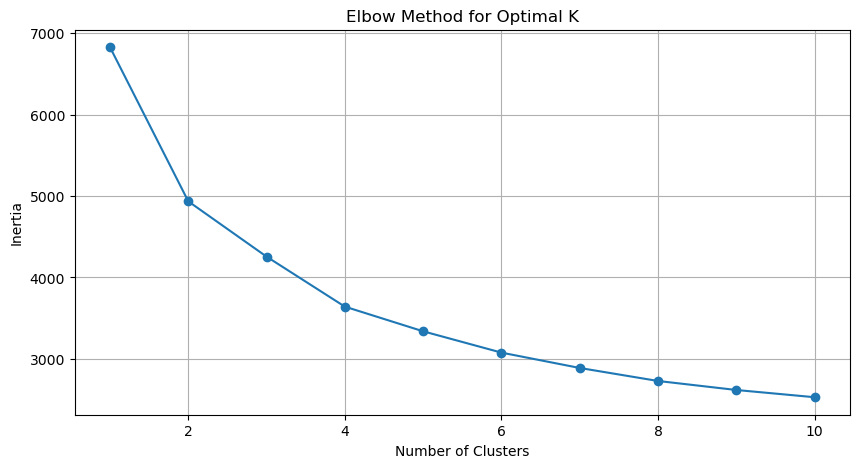

In [25]:
max_k = 10

optimise_k_means(final_df1, max_k)

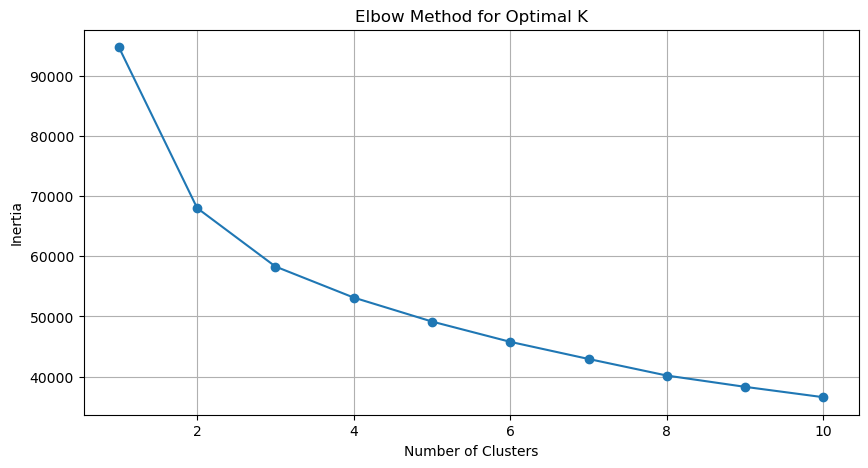

In [26]:
max_k = 10

optimise_k_means(final_df2, max_k)

# Applying K-Means Clustering

In [27]:
kmeans = KMeans(n_clusters= 3, n_init='auto')

kmeans.fit(final_df1)

df1['Cluster'] = kmeans.labels_
final_df1['Cluster'] = kmeans.labels_

df1.head()

,Artist,Track,Album,Album_type,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,...,Channel,Views,Likes,Comments,Licensed,official_video,Stream,EnergyLiveness,most_playedon,Cluster
0,Gorillaz,Feel Good Inc.,Demon Days,album,0.818,0.705,-6.679,0.1770,0.008360,0.002330,...,Gorillaz,693555221.0,6220896.0,169907.0,True,True,1.040235e+09,1.150082,Spotify,0
1,Gorillaz,Rhinestone Eyes,Plastic Beach,album,0.676,0.703,-5.815,0.0302,0.086900,0.000687,...,Gorillaz,72011645.0,1079128.0,31003.0,True,True,3.100837e+08,15.183585,Spotify,0
2,Gorillaz,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,0.695,0.923,-3.930,0.0522,0.042500,0.046900,...,Gorillaz,8435055.0,282142.0,7399.0,True,True,6.306347e+07,7.956897,Spotify,0
3,Gorillaz,On Melancholy Hill,Plastic Beach,album,0.689,0.739,-5.810,0.0260,0.000015,0.509000,...,Gorillaz,211754952.0,1788577.0,55229.0,True,True,4.346636e+08,11.546875,Spotify,1
4,Gorillaz,Clint Eastwood,Gorillaz,album,0.663,0.694,-8.627,0.1710,0.025300,0.000000,...,Gorillaz,618480958.0,6197318.0,155930.0,True,True,6.172597e+08,9.942693,Youtube,1


In [28]:
kmeans = KMeans(n_clusters= 3, n_init='auto')

kmeans.fit(final_df2)

df2['Cluster'] = kmeans.labels_
final_df2['Cluster'] = kmeans.labels_

df2.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,Cluster
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic,1
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic,0
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic,2
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic,0
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic,0
